In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rng = np.random.RandomState(20180201)
DEFAULT_SEED=123456

In [35]:
data = pd.read_csv("creditcard.csv")
stats = pd.DataFrame({'mean':data.mean(), 'std':data.std(), 'skew':data.skew()})
data['Amount'] = data['Amount'].apply(lambda x: np.log(x+1e-6))
data.loc[:,'V1':'Amount'] = data.loc[:,'V1':'Amount'].apply(lambda x: (x-x.mean())/x.std())
#data.loc[:,'V1':'V28'] = data.loc[:,'V1':'V28'].apply(lambda x: (x-x.min())/(x.std(x.max()-x.min())))

'''
pos_data = data[data["Class"]==1]
neg_data = data[data["Class"]==0]
for key in data.keys()[1:-2]: # for all principle components
    fig = plt.figure(figsize=(4,3))
    plt.hist(pos_data[key], histtype="step", normed=True, bins=50, range=(-1,1), label="pos")
    plt.hist(neg_data[key], histtype="step", normed=True, bins=50, range=(-1,1), label="neg")
    plt.xlim(-1,1)
    plt.title(key)
    plt.legend()
    fig.savefig(key+"_Scaled.png")
'''

stats

,mean,skew,std
Time,9.481386e+04,-0.035568,47488.145955
V1,3.919560e-15,-3.280667,1.958696
V2,5.688174e-16,-4.624866,1.651309
V3,-8.769071e-15,-2.240155,1.516255
V4,2.782312e-15,0.676292,1.415869
V5,-1.552563e-15,-2.425901,1.380247
V6,2.010663e-15,1.826581,1.332271
V7,-1.694249e-15,2.553907,1.237094
V8,-1.927028e-16,-8.521944,1.194353
V9,-3.137024e-15,0.554680,1.098632


In [36]:
def split_DataFrame(data, label, frac, rng=None, oversample=False):
    if rng is None:
        rng = np.random.RandomState(DEFAULT_SEED)
    subdf1 = pd.DataFrame()
    subdf2 = pd.DataFrame()
    for val in set(data[label]):
        df = data[data[label]==val]
        mask = rng.rand(len(df)) < frac
        subdf1 = pd.concat([df[mask], subdf1]).sample(frac=1).reset_index(drop=True)
        subdf2 = pd.concat([df[~mask], subdf2]).sample(frac=1).reset_index(drop=True)
    return (subdf1, subdf2)

# train : test : valid = 0.6 : 0.2 : 0.2 
train_df, dump = split_DataFrame(data, label='Class', frac=0.6)
test_df, valid_df = split_DataFrame(dump, label='Class', frac=0.5)

train = train_df.as_matrix()
test = test_df.as_matrix()
valid = valid_df.as_matrix()

In [40]:
np.savez_compressed('trainset.npz', train)
np.savez_compressed('testset.npz', test)
np.savez_compressed('validset.npz', valid)

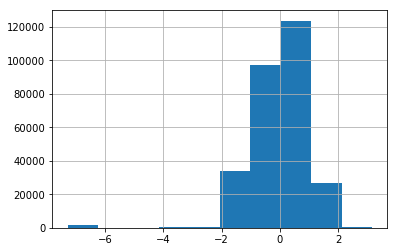

In [38]:
data['Amount'].hist()